In [1]:
import glob
import torch
from torch import Tensor
from pathlib import Path
from typing import Dict, List
from torchinfo import summary

In [2]:
percussion_file = "../models/percussion.ts"

model = torch.jit.load(percussion_file)
model.eval()
print(f"Model cropped size: {model.cropped_latent_size}")

summary(model)

Model cropped size: 4


Layer (type:depth-idx)                                                      Param #
TraceModel                                                                  --
├─Resampling: 1-1                                                           --
│    └─Identity: 2-1                                                        --
│    └─Identity: 2-2                                                        --
├─CachedPQMF: 1-2                                                           --
│    └─CachedConv1d: 2-3                                                    4,112
│    │    └─CachedPadding1d: 3-1                                            --
│    │    └─CachedPadding1d: 3-2                                            --
│    └─CachedConv1d: 2-4                                                    4,352
│    │    └─CachedPadding1d: 3-3                                            --
│    │    └─CachedPadding1d: 3-4                                            --
├─Encoder: 1-3                           

In [3]:
drumkit_file = "../models/drumkit_v1.ts"

model = torch.jit.load(drumkit_file)
model.eval()
print(f"Model cropped size: {model.latent_size}")
summary(model)

for name, param in model.state_dict().items():
    print(f"Parameter name: {name}")
    print(f"Parameter shape: {param.shape}")

Model cropped size: 128
Parameter name: latent_pca
Parameter shape: torch.Size([128, 128])
Parameter name: latent_mean
Parameter shape: torch.Size([128])
Parameter name: latent_size
Parameter shape: torch.Size([])
Parameter name: sampling_rate
Parameter shape: torch.Size([])
Parameter name: max_batch_size
Parameter shape: torch.Size([])
Parameter name: encode_params
Parameter shape: torch.Size([4])
Parameter name: decode_params
Parameter shape: torch.Size([4])
Parameter name: forward_params
Parameter shape: torch.Size([4])
Parameter name: pqmf.hk
Parameter shape: torch.Size([16, 256])
Parameter name: pqmf.h
Parameter shape: torch.Size([249])
Parameter name: pqmf.forward_conv.weight
Parameter shape: torch.Size([16, 1, 257])
Parameter name: pqmf.forward_conv.cache.pad
Parameter shape: torch.Size([64, 1, 256])
Parameter name: pqmf.forward_conv.downsampling_delay.pad
Parameter shape: torch.Size([64, 1, 0])
Parameter name: pqmf.inverse_conv.weight
Parameter shape: torch.Size([16, 16, 17])
P

In [4]:
darbouka_file = "../models/darbouka_onnx.ts"

model = torch.jit.load(darbouka_file)
model.eval()
# print(f"Model cropped size: {model.cropped_latent_size}")
summary(model)

Layer (type:depth-idx)                                                                          Param #
ScriptedRAVE                                                                                    --
├─CachedPQMF: 1-1                                                                               --
│    └─CachedConv1d: 2-1                                                                        8,208
│    │    └─CachedPadding1d: 3-1                                                                --
│    │    └─CachedPadding1d: 3-2                                                                --
│    └─CachedConv1d: 2-2                                                                        8,448
│    │    └─CachedPadding1d: 3-3                                                                --
│    │    └─CachedPadding1d: 3-4                                                                --
├─VariationalEncoder: 1-2                                                                       --

In [5]:
gmdrums_file = "../models/GMDrums_v3_29-09_3M_streaming.ts"

model = torch.jit.load(gmdrums_file)
model.eval()
print(f"Model cropped size: {model.latent_size}")
summary(model)

Model cropped size: 16


Layer (type:depth-idx)                                                      Param #
WasserteinScriptedRAVE                                                      --
├─CachedPQMF: 1-1                                                           --
│    └─CachedConv1d: 2-1                                                    8,208
│    │    └─CachedPadding1d: 3-1                                            --
│    │    └─CachedPadding1d: 3-2                                            --
│    └─CachedConv1d: 2-2                                                    8,448
│    │    └─CachedPadding1d: 3-3                                            --
│    │    └─CachedPadding1d: 3-4                                            --
├─WasserteinEncoder: 1-2                                                    --
│    └─EncoderV2: 2-3                                                       --
│    │    └─CachedSequential: 3-5                                           14,943,648
├─GeneratorV2: 1-3               

In [6]:
for name, param in model.state_dict().items():
    print(f"Parameter name: {name}")
    print(f"Parameter shape: {param.shape}")

Parameter name: learn_target_params
Parameter shape: torch.Size([1])
Parameter name: reset_target_params
Parameter shape: torch.Size([1])
Parameter name: learn_source_params
Parameter shape: torch.Size([1])
Parameter name: reset_source_params
Parameter shape: torch.Size([1])
Parameter name: latent_pca
Parameter shape: torch.Size([16, 16])
Parameter name: latent_mean
Parameter shape: torch.Size([16])
Parameter name: fidelity
Parameter shape: torch.Size([16])
Parameter name: encode_params
Parameter shape: torch.Size([4])
Parameter name: decode_params
Parameter shape: torch.Size([4])
Parameter name: forward_params
Parameter shape: torch.Size([4])
Parameter name: pqmf.hk
Parameter shape: torch.Size([16, 512])
Parameter name: pqmf.h
Parameter shape: torch.Size([377])
Parameter name: pqmf.forward_conv.weight
Parameter shape: torch.Size([16, 1, 513])
Parameter name: pqmf.forward_conv.cache.pad
Parameter shape: torch.Size([64, 1, 512])
Parameter name: pqmf.forward_conv.downsampling_delay.pad
P

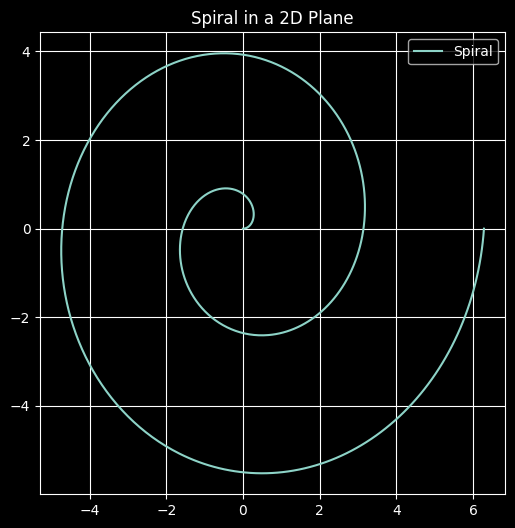

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate polar coordinates for the spiral
theta = np.linspace(0, 4 * np.pi, 1000)
radius = 0.5 * theta

# Convert polar coordinates to Cartesian coordinates
x = radius * np.cos(theta)
y = radius * np.sin(theta)

# Plot the spiral
plt.figure(figsize=(6, 6))
plt.plot(x, y, label='Spiral')
plt.title('Spiral in a 2D Plane')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# Function to generate coordinates for a spiral
def generate_spiral_points(num_points):
    theta = np.linspace(0, 4 * np.pi, num_points)
    radius = 0.5 * theta
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    return x, y

# Number of points to generate
num_points = 22

# Generate spiral coordinates
x_spiral, y_spiral = generate_spiral_points(num_points)

# Display the coordinates
for i in range(num_points):
    print(f"Point {i + 1}: ({x_spiral[i]:.4f}, {y_spiral[i]:.4f})")


Point 1: (0.0000, 0.0000)
Point 2: (0.2472, 0.1685)
Point 3: (0.2186, 0.5570)
Point 4: (-0.1997, 0.8751)
Point 5: (-0.8773, 0.8140)
Point 6: (-1.4793, 0.2230)
Point 7: (-1.6174, -0.7789)
Point 8: (-1.0472, -1.8138)
Point 9: (0.1789, -2.3869)
Point 10: (1.6789, -2.1053)
Point 11: (2.8591, -0.8819)
Point 12: (3.1450, 0.9701)
Point 13: (2.2386, 2.8071)
Point 14: (0.2907, 3.8787)
Point 15: (-2.0944, 3.6276)
Point 16: (-4.0435, 1.9473)
Point 17: (-4.7337, -0.7135)
Point 18: (-3.7286, -3.4596)
Point 19: (-1.1984, -5.2506)
Point 20: (2.0769, -5.2918)
Point 21: (4.9442, -3.3709)
Point 22: (6.2832, -0.0000)


In [11]:
# Function to generate coordinates for a spiral in an 8-dimensional space
def generate_spiral_points_8d(num_points):
    theta = np.linspace(0, 4 * np.pi, num_points)
    radius = 0.5 * theta
    
    # Extend to 8 dimensions by replicating the pattern
    coords_8d = np.zeros((num_points, 8))
    coords_8d[:, :2] = np.column_stack((radius * np.cos(theta), radius * np.sin(theta)))
    
    return coords_8d

# Number of points to generate
num_points = 22

# Generate spiral coordinates in 8 dimensions
spiral_8d = generate_spiral_points_8d(num_points)

# Display the coordinates
for i in range(num_points):
    print(f"Point {i + 1}: {spiral_8d[i]}")


Point 1: [0. 0. 0. 0. 0. 0. 0. 0.]
Point 2: [0.24721006 0.16854497 0.         0.         0.         0.
 0.         0.        ]
Point 3: [0.21861956 0.55703355 0.         0.         0.         0.
 0.         0.        ]
Point 4: [-0.19973432  0.87509325  0.          0.          0.          0.
  0.          0.        ]
Point 5: [-0.87731443  0.81402883  0.          0.          0.          0.
  0.          0.        ]
Point 6: [-1.47928746  0.22296671  0.          0.          0.          0.
  0.          0.        ]
Point 7: [-1.61741553 -0.77890627  0.          0.          0.          0.
  0.          0.        ]
Point 8: [-1.04719755 -1.81379936  0.          0.          0.          0.
  0.          0.        ]
Point 9: [ 0.17887353 -2.38690143  0.          0.          0.          0.
  0.          0.        ]
Point 10: [ 1.67892941 -2.10531089  0.          0.          0.          0.
  0.          0.        ]
Point 11: [ 2.85906715 -0.88190542  0.          0.          0.          0.
  0. 